# EMA demographics fig

John Curtin and Kendra Wyant

## Overview and Setup

Creates a paneled figure for EMA study demograhics

### Set up environment

In [ ]:
# handle conflicts
options(conflicts.policy = "depends.ok")

library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

### Read in data

In [ ]:
disposition <- read_csv(file.path(path_processed, "disposition.csv"), 
                        col_types = "ccDDcccccccccc")
screen <- read_csv(file.path(path_shared, "screen.csv"), 
                   col_types = cols()) |>
  filter(subid %in% subset(disposition, analysis == "yes")$subid) |> 
  mutate(across(dsm5_1:dsm5_11, ~ if_else(.x == "Yes", 1, 0))) |>  
  rowwise() |>  
  mutate(aud_total = sum(c(dsm5_1, dsm5_2, dsm5_3, dsm5_4, dsm5_5, dsm5_6, dsm5_7, 
                              dsm5_8, dsm5_9, dsm5_10, dsm5_11))) |> 
  ungroup() |> 
  select(age = dem_1, sex = dem_2, white = dem_3, educ = dem_5, 
         income = dem_7, ms = dem_8, aud_total)   |> 
  mutate(white = if_else(white == "White/Caucasian", "White/Non-hispanic", "Other")) |> 
  mutate(educ = case_match(educ, 
                  "2-Year degree" ~ "Some college",
                  "High school or GED" ~ "<= High school", 
                  "Less than high school or GED degree" ~ "<= High school",
                  "College degree" ~ "4 year college degree",
                  .default = educ)) |> 
  mutate(ms = case_match(ms,
                "Never Married" ~ "Never married",
                "Separated" ~ "Divorced",
                .default = ms)) |> 
  mutate(income =  income / 1000)

## Pie Charts

Education

In [ ]:
fig_educ <- screen |>
  mutate(group = educ) |> 
  mutate(group = fct(group, levels = c(
    "<= High school", "Some college",
    "4 year college degree", "Advanced degree"
  ))) |>
  count(group) |>
  ggplot(aes(x = "", y = n, fill = group)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0, direction = -1) +
  scale_fill_manual(values = c("#b0bec5", "#263238", "#ef9a9a", "white")) +
  geom_text(aes(label = group), position = position_stack(vjust = 0.7),
  size = 6) + 
  theme_void() +
  theme(legend.title = element_blank(), legend.position = "none") +
  ggtitle(NULL) +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(title = element_text(size = 16, face = "bold"))

Race/ethnicity

In [ ]:
fig_race <- screen |>
  mutate(group = white) |> 
  count(group) |>
  ggplot(aes(x = "", y = n, fill = group)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0, direction = -1) +
  scale_fill_manual(values = c("#b0bec5", "#ef9a9a")) +
  geom_text(aes(label = group), position = position_stack(vjust = 0.7),
  size = 6) + 
  theme_void() +
  theme(legend.title = element_blank(), legend.position = "none") +
  ggtitle(NULL) +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(title = element_text(size = 16, face = "bold"))

Sex

In [ ]:
fig_sex <- screen |>
  mutate(group = sex) |> 
  count(group) |>
  ggplot(aes(x = "", y = n, fill = group)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0, direction = -1) +
  scale_fill_manual(values = c("#b0bec5", "#ef9a9a")) +
  geom_text(aes(label = group), position = position_stack(vjust = 0.7),
  size = 6) + 
  theme_void() +
  theme(legend.title = element_blank(), legend.position = "none") +
  ggtitle(NULL) +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(title = element_text(size = 16, face = "bold"))

## Histograms

AUD Sx

In [ ]:
#| label: fig-aud_symptoms
#| fig-cap: AUD Symptom Count
#| fig-height: 6
#| fig-width: 6

fig_aud <- screen |>
  ggplot(aes(x = aud_total)) +
  geom_histogram(bins = 11, fill = "#263238", color = "white") +
  labs(x = "Number of AUD Symptoms", y = NULL) +
  ggtitle(NULL) +
  theme(plot.title = element_text(hjust = 0.5)) + 
  scale_x_continuous(breaks = seq(1, 11),
                       limits = c(1, 11)) +
  theme(axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16)) +
  theme(title = element_text(size = 16, face = "bold"),
        axis.line.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank())

Age

In [ ]:
fig_age <- screen |>
  ggplot(aes(x = age)) +
  geom_histogram(fill = "#263238", color = "white", bins = 30) +
  labs(x = "Age", y = NULL) +
  ggtitle(NULL) +
  theme(plot.title = element_text(hjust = 0.5)) + 
  theme(axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16)) +
  theme(title = element_text(size = 16, face = "bold"),
        axis.line.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank())

Income

In [ ]:
fig_income <- screen |>
  ggplot(aes(x = income)) +
  geom_histogram(fill = "#263238", color = "white", bins = 30) +
  labs(x = "Income ($ in thousands)", y = NULL) +
  ggtitle(NULL) +
  theme(plot.title = element_text(hjust = 0.5)) + 
  theme(axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16)) +
  theme(title = element_text(size = 16, face = "bold"),
        axis.line.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank())

## Combined

Combined all six demographics plots into one figure

(`geom_bar()`).

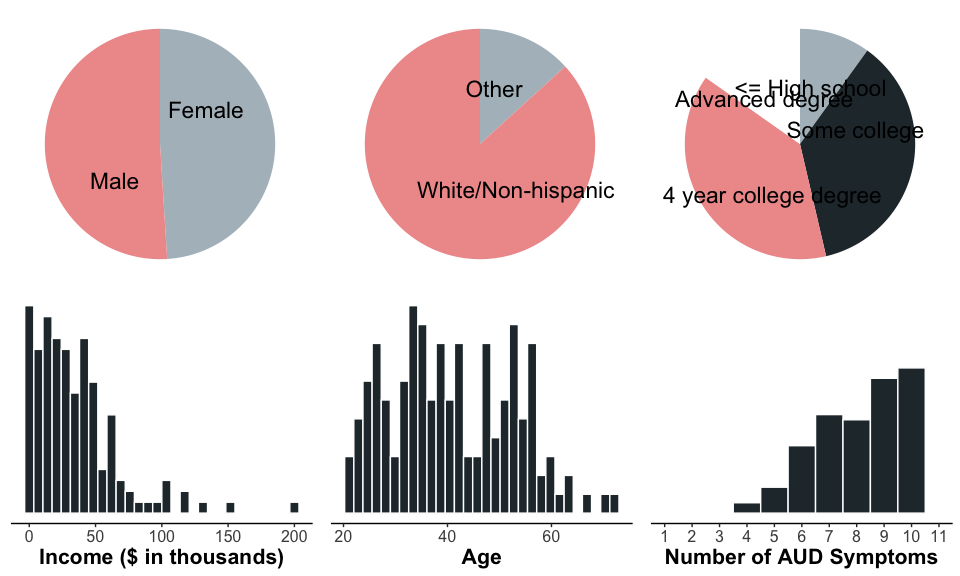

In [ ]:
#| label: fig-demographics
#| fig-cap: Demographics
#| fig-height: 6
#| fig-width: 10

cowplot::plot_grid(fig_sex, fig_race, fig_educ, fig_income, fig_age, fig_aud,  nrow = 2, ncol = 3)